In [1]:
# Import my packages
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits import mplot3d
from matplotlib import animation
from scipy.fft import fft, ifft, ifft2, fftfreq, fft2, fftshift
from scipy import signal

In [3]:
# apply figure 1
# Here I run all my functions from fig one
%run fig1_functions_latest.ipynb

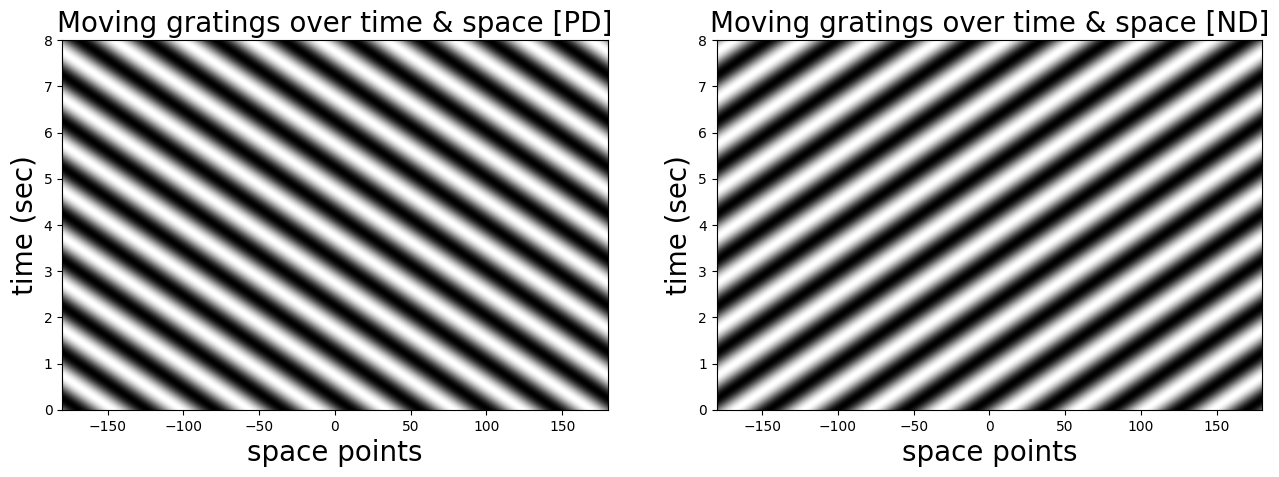

In [25]:
########## Fig.2A stimulus ###########
########## parameters
c_o=0.5 # as Fig.1?
omega=2*math.pi  # f=1Hz
k=(2*math.pi)/45 # k is in radians/degrees ,λ=25deg for Fig2A and λ=45deg for Fig2B
t=np.arange(0, 8, 1/240) 
x=np.arange(-180, 180, 0.5)
y=np.arange(-180, 180, 0.5)
contrast_pd = np.empty([len(x),len(t)]) 
contrast_nd = np.empty([len(x),len(t)]) 
for j, x_value in enumerate(x):
    for i,t_value in enumerate(t): 
        c_pd= c_o*np.sin(omega*t[i]-k*x[j])  
        c_nd= c_o*np.sin(omega*t[i]+k*x[j]) 
        contrast_pd[j,i]= c_pd
        contrast_nd[j,i]= c_nd
# now stack the contrast on top of each other in a 360 range of the y axis
contrast_2D_pd = np.empty([len(y),len(y),len(t)]) 
contrast_2D_nd = np.empty([len(y),len(y),len(t)]) 
for k, y_value in enumerate(y):
    contrast_2D_pd[k,:,:] = contrast_pd[:,:]
    contrast_2D_nd[k,:,:] = contrast_nd[:,:]
plt.subplot(1,2,1)
plt.imshow(contrast_2D_pd[0,:,:].T,cmap='gray',extent = [-180,180,0,8],  aspect = 'auto')
plt.xlabel('space points',fontsize="20")
plt.ylabel('time (sec)',fontsize="20")
plt.title('Moving gratings over time & space [PD]',fontsize="20")
plt.subplot(1,2,2)
plt.imshow(contrast_2D_nd[0,:,:].T,cmap='gray',extent = [-180,180,0,8], aspect = 'auto')
plt.xlabel('space points',fontsize="20")
plt.ylabel('time (sec)',fontsize="20")
plt.title('Moving gratings over time & space [ND]',fontsize="20")
plt.subplots_adjust(right=2)
#plt.savefig('2d_pd_and_nd.png')

In [5]:
###### parameters
t = np.arange(0, 8, 1/240)
x = np.arange(-180, 180, 0.5)
x_range = x
t_range = t
E_inh = -30 
E_exc = 60
c_o = 0.5 # max contrast for gradings stimuli
f=1 # Hz
#omega = 2*math.pi*f
##k = 0#(2*math.pi)/45
tau = 0.15 # s
time_step = 1/240
FWHM = 5.7
#x_initial = -180
#which_stimulus = 'FTB_OFF' # choose the stimulus
#c = gratings(c_o, omega, k, t_range, x_range)# edge_stimulus(which_stimulus, t_range, x_range, x_initial)

In [81]:
contrast_2D_pd.shape

(720, 720, 1920)

In [37]:
####### Run all the functions: filters in FT, convolution, calculation of g's, V_m and calcium responses
h,h_shifted, sample_freq_x = gauss_FT(FWHM, x_range)
###### Run my simulation and then basicaly just play with data
sample_freq_shifted,f_shifted = time_filter(tau,t,time_step)
sample_freq_shifted_dev,f_dev_shifted = time_filter_der(tau,t,time_step)
#c = gratings(c_o, f, k, t_range, x_range)# edge_stimulus(which_stimulus, t_range, x_range, x_initial)
c_shifted = contrast_fourier(contrast_2D_pd[0,:,:],x_range,t_range)
filtered_c_f = filtered_contrast_f(sample_freq_x, sample_freq_shifted,c_shifted, f_shifted,h_shifted) # nondelayed input
filtered_c_dev = filtered_contrast_f_dev(sample_freq_x, sample_freq_shifted_dev, c_shifted,f_dev_shifted,h_shifted) # delayed input
g1_div_g_l, g2_div_g_l, g3_div_g_l, V_m , calcium = g_vm_cal_calculation(filtered_c_f,filtered_c_dev)

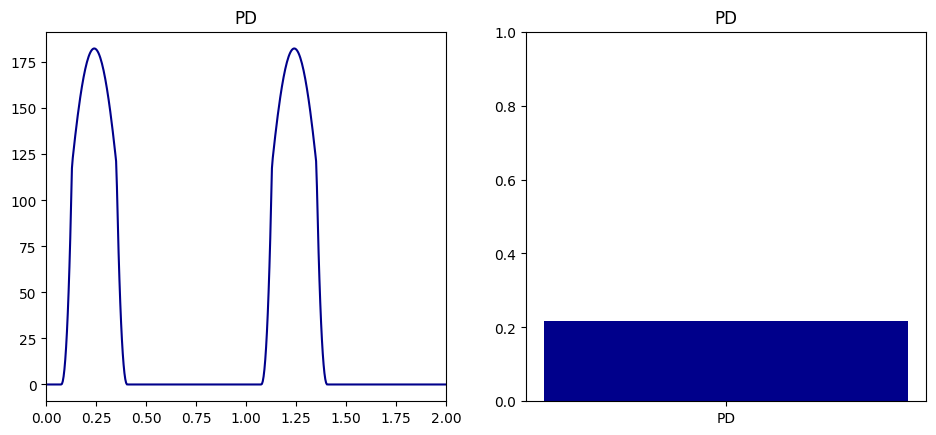

In [38]:
# Plot the caclium responses of one T4 contrast_2D_pd[0,:,:] but wrong amplitude.
plt.subplot(1,2,1)
plt.plot(t,calcium[0],color = '#00008b')
plt.xlim(0,2)
plt.title('PD')
plt.subplot(1,2,2)
# now the mean response for the calcium
mean_value = np.mean(calcium[0])
PD_max = np.max(calcium[0])
normalized_mean = mean_value/PD_max #### - np.min(calcium[0])/(np.max(calcium[0])-np.min(calcium[0]))) #mean_value #np.max(calcium[0])/PD_max 
plt.ylim(0,1)
# Here they plot normalized responses, they call it mean
plt.bar("PD",normalized_mean,color = '#00008b')
plt.title('PD')
plt.subplots_adjust(right=1.5)

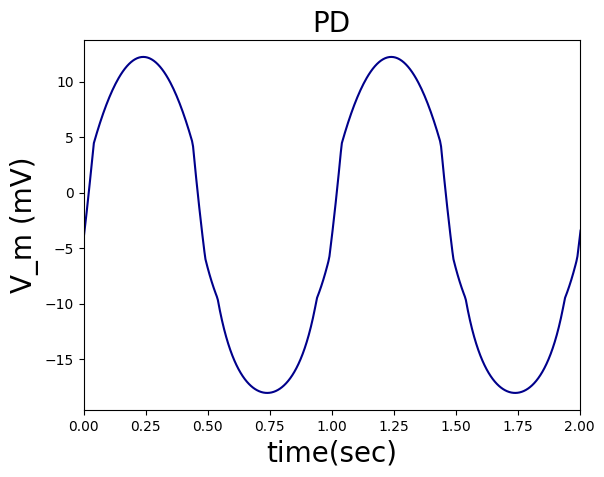

In [24]:
plt.plot(t,V_m[0],color = '#00008b')
plt.xlim(0,2)
plt.title('PD',fontsize = '20')
plt.ylabel('V_m (mV)',fontsize = '20')
plt.xlabel('time(sec)',fontsize = '20')
plt.savefig('fig2a.png')

In [84]:
max_val = np.max(calcium[0])
print(max_val)

149.25200273724872


In [85]:
PD_max = np.max(calcium[0])
print(PD_max)

149.25200273724872


In [31]:
####### Run all the functions: filters in FT, convolution, calculation of g's, V_m and calcium responses
h,h_shifted, sample_freq_x = gauss_FT(FWHM, x_range)
###### Run my simulation and then basicaly just play with data
sample_freq_shifted,f_shifted = time_filter(tau,t,time_step)
sample_freq_shifted_dev,f_dev_shifted = time_filter_der(tau,t,time_step)
#c = gratings(c_o, f, k, t_range, x_range)# edge_stimulus(which_stimulus, t_range, x_range, x_initial)
c_shifted = contrast_fourier(contrast_2D_nd[0,:,:],x_range,t_range)
filtered_c_f = filtered_contrast_f(sample_freq_x, sample_freq_shifted,c_shifted, f_shifted,h_shifted) # nondelayed input
filtered_c_dev = filtered_contrast_f_dev(sample_freq_x, sample_freq_shifted_dev, c_shifted,f_dev_shifted,h_shifted) # delayed input
g1_div_g_l, g2_div_g_l, g3_div_g_l, V_m , calcium = g_vm_cal_calculation(filtered_c_f,filtered_c_dev)

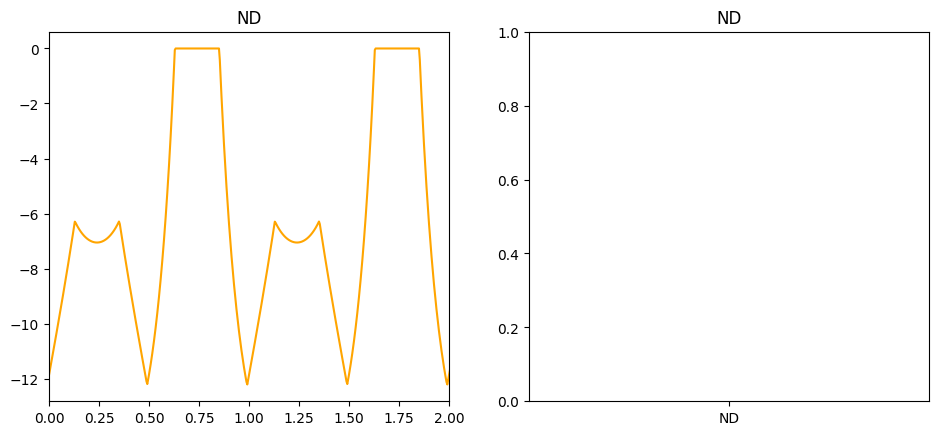

In [33]:
plt.subplot(1,2,1)
plt.plot(t,V_m[0],color = 'orange')
plt.xlim(0,2)
plt.title('ND')
plt.subplot(1,2,2)
# now the mean response for the calcium
mean_value = np.mean(calcium[0])
PD_max = np.max(calcium[0])
normalized_mean = np.max(calcium[0])
plt.bar("ND",normalized_mean,color = 'orange')
plt.ylim(0,1)
plt.title('ND')
plt.subplots_adjust(right=1.5)

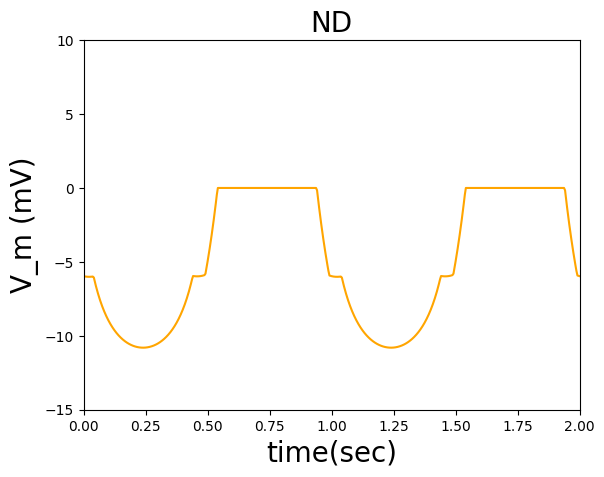

In [21]:
plt.title('ND',fontsize = '20')
plt.plot(t,V_m[0],color = 'orange')
plt.ylabel('V_m (mV)',fontsize = '20')
plt.xlabel('time(sec)',fontsize = '20')
plt.savefig('fig2a.png')
plt.xlim(0,2)
plt.ylim(-15,10)
plt.savefig('nd.png')